### Pandas 개요
- panal + datas의 합성어 (표 형식의 데이터 자료 구조)
- Series : 1차원 자료구조 (인덱스 + value)
- DataFrame : 2차원 자료구조 (행과 열로 이루어진 표 형식)
- numpy를 기반으로 만들어졌기 때문에 연산이 용이 / 가독성을 향상 

### Series
- 1차원의 자료구조
- 추가 / 수정 / 삭제가 가능
- Series는 DataFrame에서 하나의 열을 담당한다. (이때 Series명은 컬럼 명이 된다.)

### DataFrame
- 2차원의 자료구조
- 여러개의 Series가 좌우로 붙어 하나의 표 형식의 자료구조를 만든다.
- 서로 다른 자료형을 저장할 수 있다.

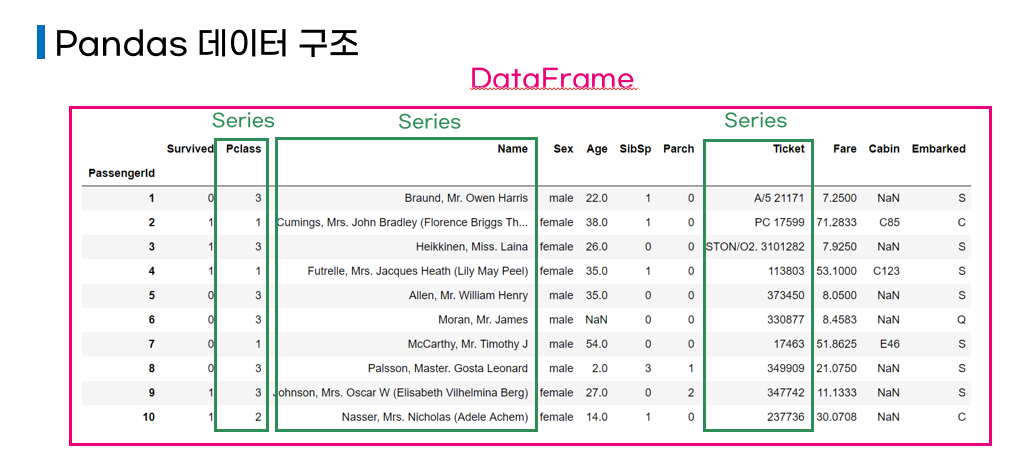
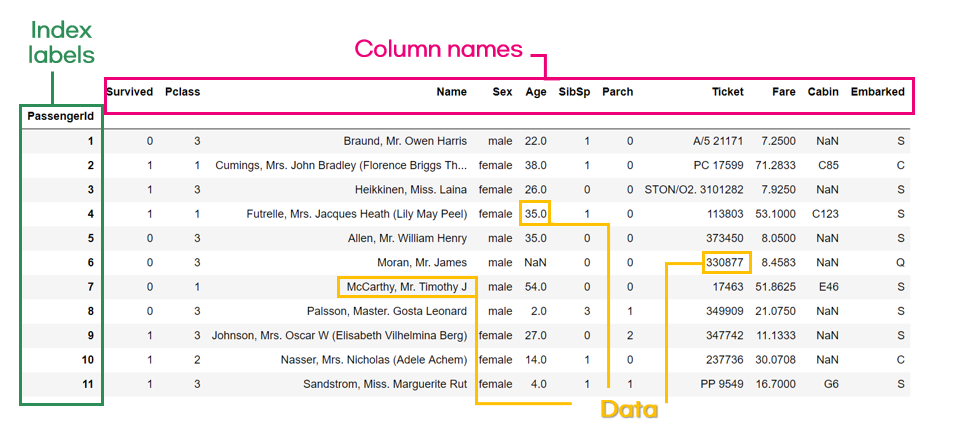

In [5]:
# 240807(2)

In [6]:
# pandas import 
import pandas as pd

In [7]:
# 시리즈 생성
ser1 = pd.Series([11,8,7],
                index = ['금','은','동']) # Series를 생성할 때는 리스트 / 딕셔너리 사용가능
ser1

금    11
은     8
동     7
dtype: int64

In [8]:
# 시리즈 데이터 추가
ser1['실격'] = 0
ser1

금     11
은      8
동      7
실격     0
dtype: int64

In [9]:
# 시리즈 데이터 추가
ser1['금'] = 22
ser1

금     22
은      8
동      7
실격     0
dtype: int64

In [10]:
# 시리즈 연산
# pandas는 numpy 기반으로 제작된 라이브러리
# numpy의 배열 연산 가능 > 그럼 pandas도 시리즈 연산 가능
ser1 + 1

금     23
은      9
동      8
실격     1
dtype: int64

In [11]:
# 시리즈 간 연산도 가능
ser1 + ser1

금     44
은     16
동     14
실격     0
dtype: int64

In [12]:
# 시리즈 인덱싱 슬라이싱
ser1[0]
# 기존에 컴퓨터가 만들어준 인덱스 번호 사용 가능
ser1['은']
# 우리가 별도로 지정한 인덱스도 사용 가능하다.

C:\Users\USER\AppData\Local\Temp\ipykernel_20140\1163182155.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ser1[0]


8

In [13]:
# 시리즈 데이터 삭제
# del : 시리즈 데이터 삭제
del ser1['실격']
ser1

금    22
은     8
동     7
dtype: int64

### 데이터 프레임 사용법

In [15]:
# 데이터 프레임 생성 함수
pd.DataFrame(['맑음', '흐림','비', '비', '비'],
							index = ['8-3', '8-4', '8-5', '8-6', '8-7'], # 인덱스에 들어갈 값을 지정하는 곳
							columns = ['날씨'] # 컬럼명 지정하는 곳
							)

,날씨
8-3,맑음
8-4,흐림
8-5,비
8-6,비
8-7,비


In [16]:
# pandas에서 데이터를 불러오는 방법
score=  pd.read_csv('./data/시험성적.csv', 
                        encoding='euc-kr', # 인코딩 방법 지정 
                       index_col = '과목') # 기존 컬럼 데이터를 이용해서 인덱스 지정 
score

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


In [17]:
# 데이터 프레임 인덱싱 / 슬라이싱
# 기존의 인덱싱 방법을 살펴보자
score['2반'] # 정상 작동

과목
수학    44
영어    92
국어    92
사회    81
과학    79
Name: 2반, dtype: int64

In [18]:
score['수학']
# 기존의 인덱싱 방식은 하나의 열 데이터만 가져올 수 있다.
# 행 데이터 접근 불가

KeyError: '수학'

In [ ]:
# 기존의 슬라이싱 방식으로 데이터 접근
score['수학' : '국어'] # 정상 작동


In [ ]:
score['1반' : '3반']
# 기존의 슬라이싱 방식은 행 접근만 가능하다
# 열 접근 불가

In [ ]:
# 인덱싱은 열만 가능 / 슬라이싱은 행만 가능
# 자유롭게 인덱싱 / 슬라이싱을 할 수 있도록 도와주는 도구 > 인덱서
# loc[] - 우리가 지정해준 인덱스 / 컬럼명을 이용해서 데이터에 접근하는 도구
# iloc[] - 컴퓨터가 자동으로 지정해준 인덱스 번호를 이용해서 데이터에 접근하는 도구

In [ ]:
# 240807(3)
# loc 인덱서 사용해보기
# 인덱서의 공통 사항 
# 1. 항상 행부터 접근한다.
# 2. 컴마 없이 사용하면 행만 접근한다.
score.loc['국어':'과학','2반':'4반']

- loc를 사용할 때 주의할 점
  - 기존 슬라이싱 규칙과는 다른 모습을 보인다.
  - 기존 슬라이싱은 끝값을 미포함
  - 우리가 만들어준 인덱스, 컬럼명을 사용하는 loc는 끝 값을 포함!

In [ ]:
# loc 실습
# 1. 1반과 2반의 전체 성적을 가져와주세요
score.loc[:,'1반': '2반']

In [ ]:
# 2. 전체 반의 사회, 과학 성적을 가져와주세요
score.loc['사회':'과학',:]

In [ ]:
# 3. 3반 , 4반의 국어, 사회 성적을 가져와주세요
score.loc['국어':'사회','3반':'4반']

In [ ]:
# 4. 2반에 영어성적을 가져와주세요

# 쌤풀이
# 2가지 방법 존재
# 하나의 값만 뽑아오는 방법
score.loc['영어','2반']

# 데이터 프레임 형태로 뽑는 방법
score.loc['영어':'영어','2반':'2반']

In [ ]:
score

In [ ]:
# iloc 사용해보기
score.iloc[ 0:2 , 2:]

- iloc를 사용할 때 주의할 점
  - 기존 슬라이싱 규칙이 적용된 모습을 보인다.
  - 기존 슬라이싱은 끝값을 미포함, 항상 끝값에 +1을 해줘야 한다.
  - 인덱스 번호는 항상 0번에서 시작한다.

In [ ]:
score

In [ ]:
# iloc 실습
# 1) 1반과 2반의 모든 성적을 가져왖쉐요
score.iloc[:,0:2]

In [ ]:
# 2) 전체반의 영어, 국어 성적을 가져와주세요
score.iloc[1:3,:]

In [ ]:
# 3) 3반 4반의 국어, 사회 성적을 가져와주세요
score.iloc[2:4,2:]

In [ ]:
#4) 2반의 과학 성적을 가져와주세요
score.iloc[4,1]

In [ ]:
score.iloc[4:,1:2]

In [ ]:
#5) 전체 데이터를 가져와주세요
score
# score.iloc[:,:]

In [ ]:
# loc/iloc 심화문제

In [ ]:
# 자영풀이
# 심1) 1반과 3반의 전체 과목 점수 가져오기
score.loc[:, ['1반','3반']]

In [ ]:
# 심2) 전체 반의 수학과 과학 점수  가져오기
score.loc[['수학','과학'],:]

In [ ]:
# 심3) 2반과 3반의 영어와 사회 점수 가져오기
score.loc[['영어','사회'],'2반':'3반']

In [24]:
# 240808(1)

In [30]:
# 쌤풀이
# 심1) 1반과 3반의 전체 과목 점수 가져오기
# 인덱싱의 방법을 도입시켜보자
score.iloc[:, [0,2]]
# 심2) 전체 반의 수학과 과학 점수  가져오기
score.loc[['수학','과학'],:]
# 심3) 2반과 3반의 영어와 사회 점수 가져오기
score.loc[['영어','사회'],'2반':'3반']

,2반,3반
과목,,
영어,92,45
사회,81,85
